In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score
from sklearn.model_selection import GroupShuffleSplit


In [242]:
df=pd.read_csv("newborn_health_monitoring_with_risk.csv")

In [243]:
df.shape

(3000, 25)

In [244]:
nul=df.isnull().sum()
nul

baby_id                           0
name                              0
gender                            0
gestational_age_weeks             0
birth_weight_kg                   0
birth_length_cm                   0
birth_head_circumference_cm       0
date                              0
age_days                          0
weight_kg                         0
length_cm                         0
head_circumference_cm             0
temperature_c                     0
heart_rate_bpm                    0
respiratory_rate_bpm              0
oxygen_saturation                 0
feeding_type                      0
feeding_frequency_per_day         0
urine_output_count                0
stool_count                       0
jaundice_level_mg_dl              0
apgar_score                    2900
immunizations_done                0
reflexes_normal                   0
risk_level                        0
dtype: int64

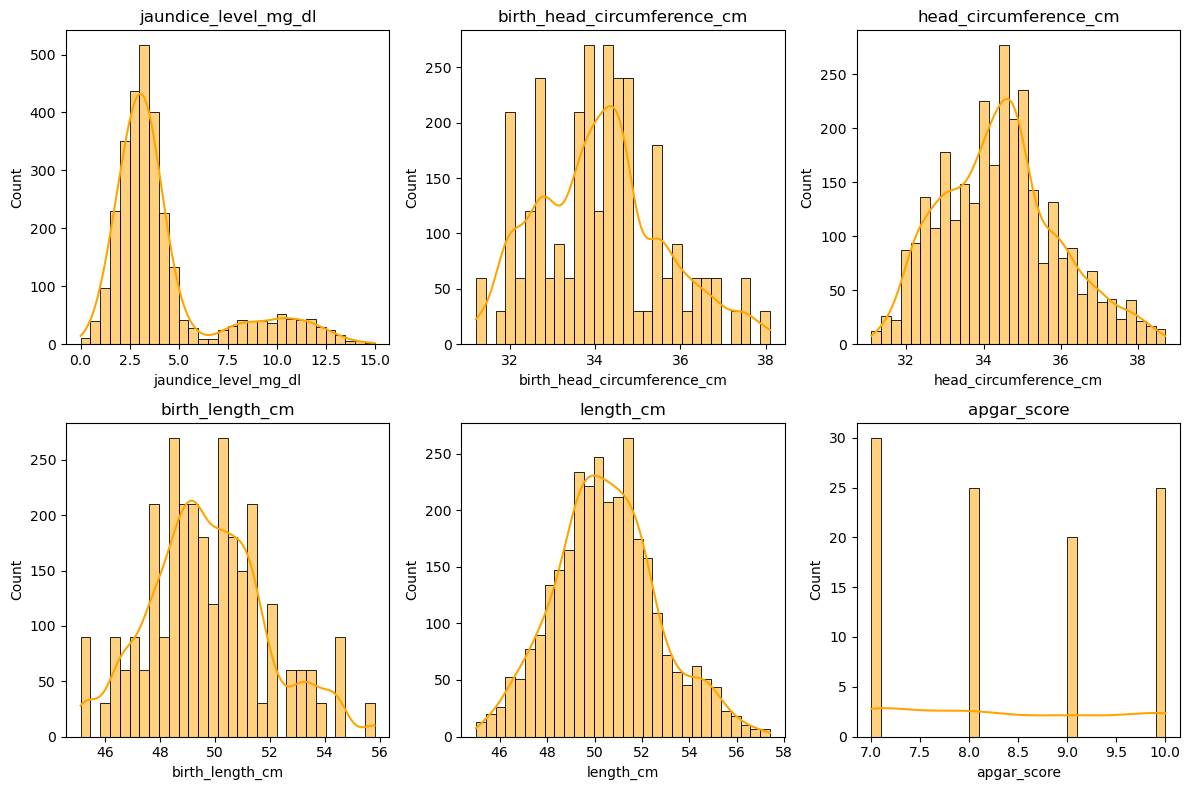

In [245]:
num_cols = df.select_dtypes(include='number')        
skew = num_cols.skew().sort_values(ascending=False) 

cols = skew.index[:6]

plt.figure(figsize=(12, 8))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)       
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='orange')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df_simple = df.copy()



target_col = 'jaundice_level_mg_dl'
df_simple = df_simple.dropna(subset=[target_col])

drop_cols = [target_col, 'risk_level', 'immunizations_done', 'apgar_score', 'baby_id', 'name', 'date']
feature_df = df_simple.drop(columns=[c for c in drop_cols if c in df_simple.columns])

feature_df = pd.get_dummies(feature_df, drop_first=True)

X = feature_df
y = df_simple[target_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print({'MAE': mae, 'RMSE': rmse, 'R2': r2})

{'MAE': 1.8448722855870945, 'RMSE': np.float64(2.3854080748373754), 'R2': 0.24549221496994356}


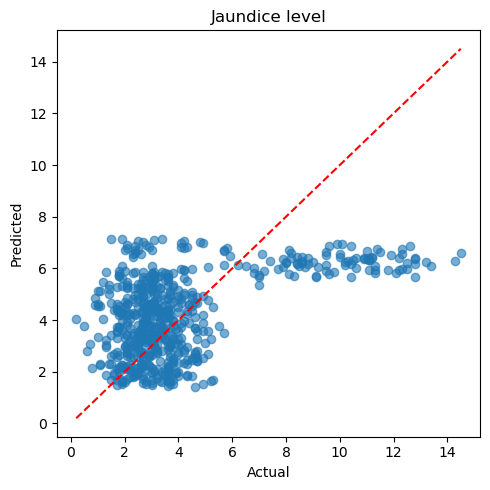

In [251]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.6)
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Jaundice level')
plt.tight_layout()
plt.show()


In [248]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


gbr = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.05, max_depth=3)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print({'MAE': mae_gbr, 'RMSE': rmse_gbr, 'R2': r2_gbr})

{'MAE': 0.9569471986158203, 'RMSE': np.float64(1.25734327713824), 'R2': 0.7903735483315197}


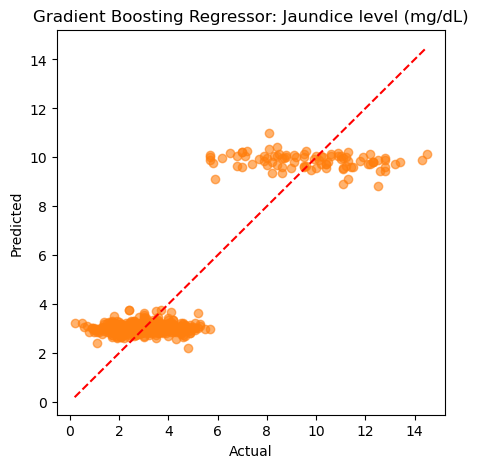

In [249]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_gbr, alpha=0.6, color='tab:orange')
lims = [min(y_test.min(), y_pred_gbr.min()), max(y_test.max(), y_pred_gbr.max())]
plt.plot(lims, lims, 'r--', label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regressor: Jaundice level (mg/dL)')
plt.show()

In [250]:
import joblib

joblib.dump(gbr, 'gbr_jaundice_model.joblib')

joblib.dump(X.columns.tolist(), 'gbr_feature_names.joblib')

['gbr_feature_names.joblib']